<h2>Important Packages</h2>

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

<h2>Auxilary functions for GWO</h2>

In [2]:
#Definig minimum function
def my_min(A):       
    """
    A should be list or array
    It returns index of least value in the array
    """
    mini = A[0]
    index = 0
    for i in range(len(A)):
        if A[i] < mini:
            mini = A[i]
            index = i
    return index

def my_max(A):       
    """
    A should be list or array
    It returns index of least value in the array
    """
    mixi = A[0]
    index = 0
    for i in range(len(A)):
        if A[i] > mixi:
            mixi = A[i]
            index = i
    return index

def get_optimum_pos(Arry):
    """
    It takes an array and return index of least 3 values.
    Since it is set to 3, it will return 3 indice. we can change this value also
    """
    pos = []
    for i in range(3):
        pos.append(my_min(Arry))
        Arry[pos[-1]] = float('inf')
    return pos
#get_pos([2,13,4,6,5])

def check_bound(new_pos, l, u):
    n = len(new_pos)
    for i in range(len(new_pos)):
        if new_pos[i]<l[i]:
            new_pos[i] = l[i]
        if new_pos[i]>u[i]:
            new_pos[i] = u[i]
    return new_pos

<h2>GWO Algorithm</h2>

In [11]:
# Gray Wolf Optimizer implementation
def gwo_optimizer(objective_function, lb, ub, population_size, iterations):
    """
    objective_function : function to be optimized
    lb : list of lowest values of parameters, its length depends on no.of parameters to be optimized
    ub : list of highest values of parameters, its length depends on no.of parameters and same as lb
    dimension ; no of variabes to be optimized = len(lb  or ub)
    population_size : It is number of wolves, that will help in optimization
    iteration : maximum number of iteration to be performed for geting optimum values of parameters
    """
    dimension = len(lb)
    # Initialize the position of the wolves ----
    positions = (lb + (ub - lb))*np.random.rand(population_size,dimension)
        
    #Initializing fitness of the wolves  ----
    fitness = np.array([objective_function(position) for position in positions])

    # Optimization loop
    for t in range(iterations):
        # Initialize the best positions of the wolves
        alpha, beta, delta = get_optimum_pos(fitness)
        X_Lead = np.array([positions[alpha],positions[beta],positions[delta]])  #(3*dimension)
        
        # Update the positions of the wolves
        for j in range(population_size):
            X_t = np.array([positions[j],positions[j],positions[j]])
            
            a = 2 - 2*(t / iterations)  # a decreases linearly in [2:0)
            r = np.random.rand(2,3)  
            A = np.matmul(np.array([[2*a, 0]]), r) - np.array([[a, a, a]])   # [[A1, A2, A3]]  1*3
            C = np.matmul(np.array([[0, 2]]) , r)  #[[C1, C2, C3]]   ----
            
            # D = [[D_alpha, D_beta, D_delta]]
            D = C.reshape(3,1)*X_Lead - X_t
            X = X_Lead - A.reshape(3,1)*D
            X_new = np.average(X, axis=0)
            
            new_pos = check_bound(X_new,lb,ub)  # mean position of updated alpha, beta & delta
            fit_score = objective_function(new_pos)
            if fitness[j]> fit_score:
                positions[j] = new_pos
                fitness[j] = fit_score
        if t%100 == 0:    
            print(f'Iteration : {t+1},\nLeaders :\n{X_Lead}\n','\n') #'New pos:\n', positions,

    # best_solution = X_Lead[0]
    return X_Lead[0]

<h2>Calling Optimization Algorithm</h2>

In [16]:
lb = [-50, -50]  # Lower bounds for LSTM parameters [ LSTM units, LSTM2 units, adam_init, epoch]
ub = [50, 50]  # Upper bounds for LSTM parameters [ LSTM units, LSTM2 units, adam_init, epoch]

def func(x,y):
    return ((x-6)**5 + (y-4)**5)
    
def objective_function(pos):
    return func(pos[0],pos[1])

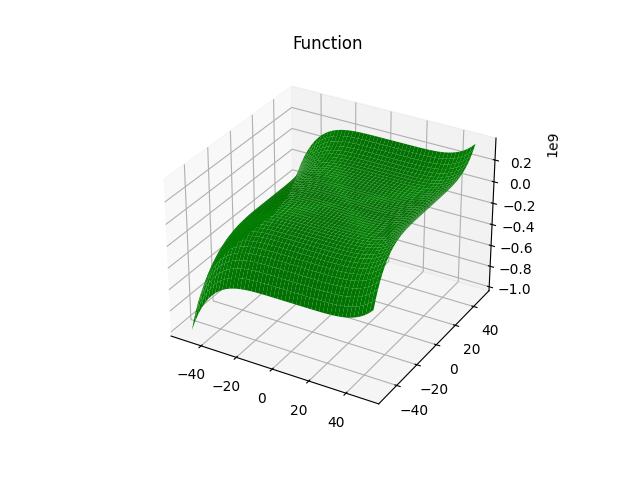

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')


x = np.linspace(lb[0],ub[0],50)
y = np.linspace(lb[1],ub[1],50)

X, Y = np.meshgrid(x, y)
Z = func(X,Y)
 
# plotting
ax.plot_surface(X, Y, Z, color='green')
ax.set_title('Function')
plt.show()

In [15]:
lb = [-50, -50]  # Lower bounds for LSTM parameters [ LSTM units, LSTM2 units, adam_init, epoch]
ub = [50, 50]  # Upper bounds for LSTM parameters [ LSTM units, LSTM2 units, adam_init, epoch]
population_size = 10  # Number of wolves in the GWO population
iterations = 1000  # Number of iterations
# Apply the GWO optimizer
optimized_params = gwo_optimizer(objective_function, np.array(lb), np.array(ub), population_size, iterations)

# Print the optimized parameters
print("Optimized Parameters:", optimized_params)

Iteration : 1,
Leaders :
[[36.36943514 39.88176862]
 [28.62554994 13.62518491]
 [20.82389191 20.97576417]]
 

Iteration : 101,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 201,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 301,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 401,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 501,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 601,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 701,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 801,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Iteration : 901,
Leaders :
[[50. 50.]
 [50. 50.]
 [50. 50.]]
 

Optimized Parameters: [50. 50.]
